## Markov Chain Analysis of Stay Times in a Mental Hospital

In [8]:
import numpy as np
import scipy.linalg
import pandas as pd

# Define the transition matrix P
P = np.array([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0.00, 0.02, 0.72, 0.20, 0.06, 0.00, 0.00],
    [0.00, 0.02, 0.14, 0.49, 0.31, 0.04, 0.00],
    [0.00, 0.02, 0.01, 0.20, 0.51, 0.24, 0.02],
    [0.01, 0.02, 0.00, 0.02, 0.28, 0.50, 0.17],
    [0.11, 0.02, 0.00, 0.00, 0.05, 0.35, 0.47]
])

# Extract the transient state matrix Q
Q = P[2:, 2:]  # Removing the absorbing states (Death and Group 6)

# Compute the fundamental matrix U = (I - Q)^-1
I = np.eye(Q.shape[0])  # Identity matrix of size Q
U = np.linalg.inv(I - Q)  # Fundamental matrix

# Compute the expected stay time in the system (sum of rows of U)
u = U.sum(axis=1)

# Convert to DataFrames for better visualization
df_P = pd.DataFrame(P, columns=["6", "Death", "1", "2", "3", "4", "5"], index=["6", "Death", "1", "2", "3", "4", "5"])
df_U = pd.DataFrame(U, columns=["1", "2", "3", "4", "5"], index=["1", "2", "3", "4", "5"])
df_u = pd.DataFrame(u, columns=["Total Stay Time"], index=["1", "2", "3", "4", "5"])

# Display results
print("Transition Matrix P:")
print(df_P)
print("\nFundamental Matrix U:")
print(round(df_U,1))
print("\nTotal Stay Time u:")
print(round(df_u,1))

Transition Matrix P:
          6  Death     1     2     3     4     5
6      1.00   0.00  0.00  0.00  0.00  0.00  0.00
Death  0.00   1.00  0.00  0.00  0.00  0.00  0.00
1      0.00   0.02  0.72  0.20  0.06  0.00  0.00
2      0.00   0.02  0.14  0.49  0.31  0.04  0.00
3      0.00   0.02  0.01  0.20  0.51  0.24  0.02
4      0.01   0.02  0.00  0.02  0.28  0.50  0.17
5      0.11   0.02  0.00  0.00  0.05  0.35  0.47

Fundamental Matrix U:
     1    2     3    4    5
1  7.3  6.8   9.3  6.8  2.5
2  4.2  7.7   9.8  7.2  2.7
3  3.3  5.8  10.8  7.7  2.9
4  2.7  4.8   8.7  8.8  3.2
5  2.1  3.8   6.8  6.5  4.2

Total Stay Time u:
   Total Stay Time
1             32.7
2             31.7
3             30.4
4             28.3
5             23.4


## Graph Visualization

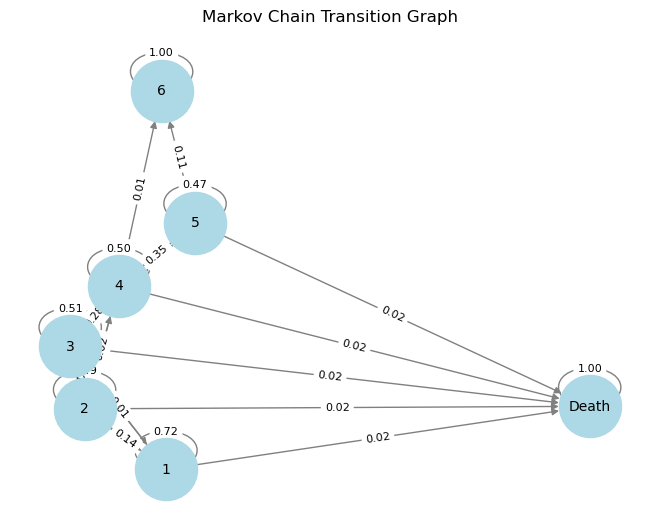

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

states = ["6", "Death", "1", "2", "3", "4", "5"]  # State labels

# Create a directed graph
G = nx.DiGraph()

# Add edges with transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if P[i, j] > 0:  # Only add edges for nonzero probabilities
            G.add_edge(states[i], states[j], weight=P[i, j])

# Set positions for better visualization
pos = nx.spring_layout(G, seed=42)  # Layout algorithm for positioning

# Draw nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, edge_color='gray')

# Draw edges with labels
edge_labels = {(states[i], states[j]): f"{P[i, j]:.2f}" for i in range(len(states)) for j in range(len(states)) if P[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("Markov Chain Transition Graph")
plt.show()